https://machinelearningmastery.com/how-to-evaluate-pixel-scaling-methods-for-image-classification/

In [1]:
!rm images/64x64_color/*
!rm images/64x64_gray/*
!rm images/128x128_color/*
!rm images/128x128_gray/*
!rm images/256x256_gray/*
!rm images/256x256_color/*

In [2]:
!pip install opencv-python

In [3]:
import time
import cv2
print('cv2',cv2.__version__)
from matplotlib import pyplot as plt
import glob

cv2 4.1.2


In [4]:
list_of_images = glob.glob('images/*.png') + glob.glob('images/*.jpg')

In [5]:
x = []
y = []
start_time = time.time()
for img_file in list_of_images:
    image = cv2.imread(img_file)
    x.append(image.shape[0])
    y.append(image.shape[1])
print('elapsed',round(time.time()-start_time,2),'seconds')

elapsed 37.86 seconds


# visualization of all image sizes

Text(0, 0.5, 'y')

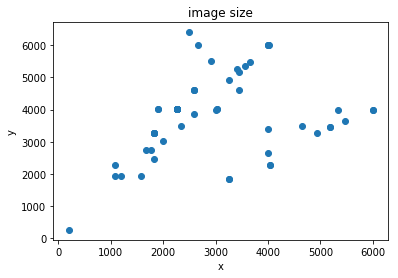

In [6]:
plt.scatter(x,y)
plt.title('image size')
plt.xlabel('x')
plt.ylabel('y')

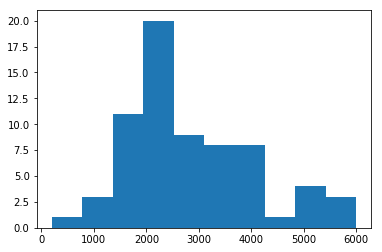

In [7]:
_=plt.hist(x)

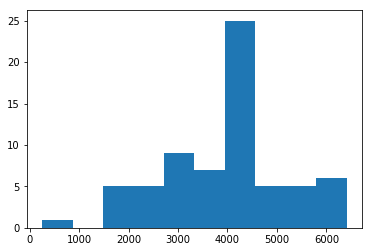

In [8]:
_=plt.hist(y)

# reshape; color

In [9]:
start_time = time.time()

for img_file in list_of_images:
    extension = img_file.split('.')[-1]
    img_file_sans_extension = img_file.replace('.'+extension,'')
    image = cv2.imread(img_file)
    dst = cv2.resize(image, (64,64))
    cv2.imwrite(img_file_sans_extension+'_64x64_color.'+extension,dst)
print('elapsed',round(time.time()-start_time,2),'seconds')

elapsed 47.57 seconds


In [10]:
start_time = time.time()

for img_file in list_of_images:
    extension = img_file.split('.')[-1]
    img_file_sans_extension = img_file.replace('.'+extension,'')
    image = cv2.imread(img_file)
    dst = cv2.resize(image, (128,128))
    cv2.imwrite(img_file_sans_extension+'_128x128_color.'+extension,dst)
print('elapsed',round(time.time()-start_time,2),'seconds')

elapsed 31.88 seconds


In [11]:
start_time = time.time()

for img_file in list_of_images:
    extension = img_file.split('.')[-1]
    img_file_sans_extension = img_file.replace('.'+extension,'')
    image = cv2.imread(img_file)
    dst = cv2.resize(image, (256,256))
    cv2.imwrite(img_file_sans_extension+'_256x256_color.'+extension,dst)
print('elapsed',round(time.time()-start_time,2),'seconds')

elapsed 34.44 seconds


In [12]:
!mv images/*_64x64_color* images/64x64_color/
!mv images/*_128x128_color* images/128x128_color/
!mv images/*_256x256_color* images/256x256_color/

# resize and grayscale

In [13]:
start_time = time.time()

for size in [64,128,256]:
    for img_file in list_of_images:
        extension = img_file.split('.')[-1]
        img_file_sans_extension = img_file.replace('.'+extension,'')
        image = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
        dst = cv2.resize(image, (size,size))
        cv2.imwrite(img_file_sans_extension+'_'+str(size)+'x'+str(size)+'_gray.'+extension,dst)
print('elapsed',round(time.time()-start_time,2),'seconds')

elapsed 40.1 seconds


In [14]:
!mv images/*_64x64_gray* images/64x64_gray/
!mv images/*_128x128_gray* images/128x128_gray/
!mv images/*_256x256_gray* images/256x256_gray/